# Pycaret



[PyCaret](https://pycaret.readthedocs.io/en/latest/) es una librería de Machine Learning de código abierto que automatiza  flujos de trabajo. Es una herramienta extremo a extremo y de gestión de modelos que acelera el ciclo de experimentación exponencialmente mediante la productividad.

En comparación con otras bibliotecas de aprendizaje automático de código abierto, PyCaret es una biblioteca alternativa de código reducido que puede utilizarse para sustituir cientos de líneas de código por unas pocas palabras. Esto hace que los experimentos sean rápidos y eficientes. PyCaret es esencialmente una envoltura de Python alrededor de varias bibliotecas de aprendizaje automático y marcos como scikit-learn, XGBoost, LightGBM, CatBoost, spaCy, Optuna, Hyperopt, Ray, etc.

El módulo de clasificación (pycaret.classification) y el de regresión (pycaret.regression), cuentan con un componente para AutoML.

<img src="https://github.com/pycaret/pycaret/blob/master/pycaret2.3.png?raw=true" alt="Drawing" style="width: 500px;"/>


## Instalación

In [1]:
#!pip install pycaret

## Pruebas

In [2]:
import numpy as np
import pandas as pd 
train = pd.read_csv('./titanic/train.csv')
test = pd.read_csv('./titanic/test.csv')

In [3]:
data = train.sample(frac=0.95, random_state=786).reset_index(drop=True)
data_unseen = train.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (846, 12)
Unseen Data For Predictions: (45, 12)


### SetUp 

La función setup() inicializa el entorno en Pycaret y crea el pipeline de transformación para preparar los datos para su modelado y despliegue. setup() debe ser llamada antes de ejecutar cualquier otra función. Toma dos parámetros obligatorios: un dataframe de pandas y el nombre de la columna de destino. El resto de parámetros son opcionales y se utilizan para personalizar el pipeline de preprocesamiento

Cuando se ejecuta setup(), PyCaret inferirá automáticamente los tipos de datos para todas las features. El tipo de datos debería inferirse correctamente, pero no siempre es así. Para tener en cuenta esto, PyCaret muestra una tabla que contiene las características y sus tipos de datos inferidos después de ejecutar setup(). Si todos los tipos de datos se identifican correctamente, se puede pulsar enter para continuar o se puede teclear quit para terminar el experimento. Asegurarse de que los tipos de datos son correctos es de importancia fundamental en PyCaret, ya que realiza automáticamente algunas tareas de preprocesamiento que son imprescindibles para cualquier experimento de aprendizaje automático. 

In [4]:
from pycaret.classification import *

In [5]:
exp_clf101 = setup(data = train, target = 'Survived', session_id=123)

,Description,Value
0,session_id,123
1,Target,Survived
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(891, 12)"
5,Missing Values,True
6,Numeric Features,3
7,Categorical Features,8
8,Ordinal Features,False
9,High Cardinality Features,False


### Comparativa

La comparación de todos los modelos para evaluar el rendimiento es el punto de partida recomendado para el modelado una vez completada la configuración (a menos que sepa exactamente qué tipo de modelo necesita, lo que a menudo no es el caso). Esta función entrena todos los modelos posibles y los puntúa. La salida imprime una tabla de puntuación que muestra el promedio de Accuracy, AUC, Recall, Precisión, F1, Kappa  MCC y su duración en segundos.

In [6]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8154,0.8575,0.6923,0.8140,0.7470,0.6030,0.6091,0.1840
ridge,Ridge Classifier,0.8139,0.0000,0.7462,0.7727,0.7587,0.6072,0.6080,0.0280
lr,Logistic Regression,0.8138,0.8586,0.7538,0.7701,0.7608,0.6084,0.6096,0.3940
dt,Decision Tree Classifier,0.8090,0.7976,0.7457,0.7660,0.7537,0.5979,0.6000,0.0300
ada,Ada Boost Classifier,0.8042,0.8458,0.7130,0.7762,0.7407,0.5838,0.5876,0.0920
rf,Random Forest Classifier,0.7994,0.8653,0.6763,0.7829,0.7241,0.5681,0.5731,0.3180
et,Extra Trees Classifier,0.7978,0.8589,0.6890,0.7697,0.7252,0.5666,0.5703,0.2760
lightgbm,Light Gradient Boosting Machine,0.7881,0.8487,0.6925,0.7540,0.7171,0.5489,0.5539,0.0920
xgboost,Extreme Gradient Boosting,0.7752,0.8407,0.6882,0.7360,0.7061,0.5250,0.5303,18.3920
knn,K Neighbors Classifier,0.6903,0.7274,0.5865,0.6123,0.5971,0.3463,0.3480,0.0460


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

### Generación del Modelo


Aunque compare_models() es una función potente y un punto de partida en cualquier experimento, no devuelve ningún modelo entrenado. El flujo de trabajo recomendado por PyCaret es utilizar compare_models() justo después de la configuración para evaluar los modelos de mayor rendimiento. Como tal, la función que realmente permite crear un modelo se llama create_model(). Esta función crea un modelo y lo puntúa utilizando la validación cruzada. De forma similar a compare_models(), la salida imprime una cuadrícula de puntuación que muestra Accuracy, AUC, Recall, Precision, F1 y Kappa por pliegues 

Miramos el DT para un ejemplo


In [7]:
dt = create_model('dt')
#trained model object is stored in the variable 'dt'. 
print(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8730,0.8674,0.8400,0.8400,0.8400,0.7347,0.7347
1,0.8413,0.8274,0.7600,0.8261,0.7917,0.6638,0.6653
2,0.7143,0.7153,0.7200,0.6207,0.6667,0.4191,0.4226
3,0.7903,0.7789,0.7200,0.7500,0.7347,0.5615,0.5618
4,0.7903,0.7599,0.6250,0.7895,0.6977,0.5405,0.5491
5,0.8065,0.7884,0.7083,0.7727,0.7391,0.5857,0.5871
6,0.7903,0.7752,0.7083,0.7391,0.7234,0.5547,0.5550
7,0.8548,0.8509,0.8333,0.8000,0.8163,0.6964,0.6968
8,0.7903,0.7906,0.7917,0.7037,0.7451,0.5681,0.5709
9,0.8387,0.8224,0.7500,0.8182,0.7826,0.6548,0.6564


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


### Model Tuning

Cuando se crea un modelo mediante la función create_model() se utilizan los hiperparámetros por defecto. Para afinar los hiperparámetros se utiliza la función tune_model(). Esta función ajusta automáticamente los hiperparámetros de un modelo en un espacio de búsqueda predefinido y lo puntúa utilizando una validación cruzada. La salida imprime la puntuación obtenida de Accuracy, AUC, Recall, Precision, F1 y Kappa por pliegue.

In [8]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8889,0.8542,0.8000,0.9091,0.8511,0.7630,0.7670
1,0.7778,0.8616,0.7600,0.7037,0.7308,0.5421,0.5432
2,0.6825,0.7663,0.6400,0.5926,0.6154,0.3458,0.3465
3,0.8065,0.8238,0.7200,0.7826,0.7500,0.5926,0.5939
4,0.7581,0.7758,0.5833,0.7368,0.6512,0.4698,0.4773
5,0.8387,0.8383,0.7083,0.8500,0.7727,0.6493,0.6558
6,0.8548,0.8207,0.7917,0.8261,0.8085,0.6917,0.6921
7,0.8387,0.8586,0.7083,0.8500,0.7727,0.6493,0.6558
8,0.7581,0.8377,0.6667,0.6957,0.6809,0.4862,0.4865
9,0.8387,0.8624,0.7917,0.7917,0.7917,0.6601,0.6601


Por defecto, tune_model() está configurado para optimizar la Accuracy, pero esto puede cambiarse utilizando el parámetro optimize. 

Por ejemplo: tune_model(dt, optimize = 'AUC') buscará los hiperparámetros del árbol de decisión que dé como resultado el mayor AUC. 

### Plot del Modelo

Se puede utilizar la función plot_model() para analizar el rendimiento en diferentes aspectos como AUC, matriz de confusión, límite de decisión, etc. Esta función toma un objeto de modelo entrenado y devuelve un gráfico basado en el conjunto de prueba.

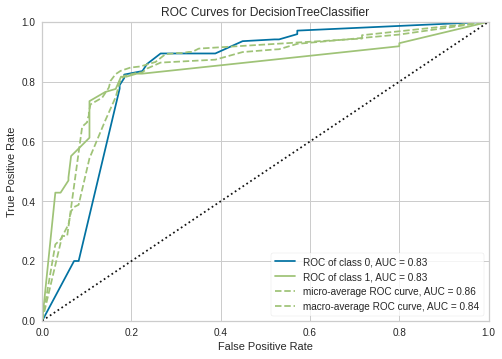

In [9]:
###AUC Plot

plot_model(tuned_dt, plot = 'auc')

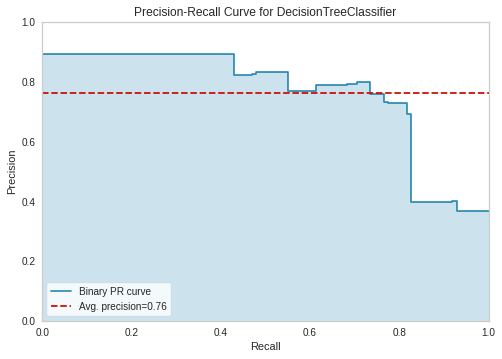

In [10]:
###  Precision-Recall Curve
plot_model(tuned_dt, plot = 'pr')

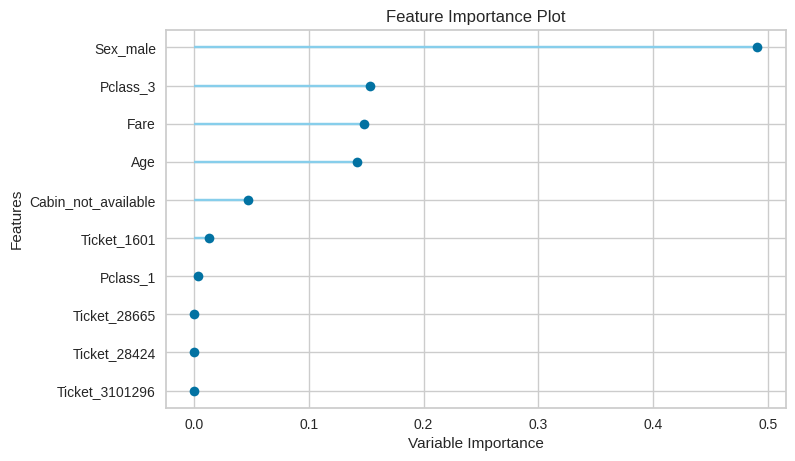

In [11]:
###  Feature Importance Plot

plot_model(tuned_dt, plot='feature')

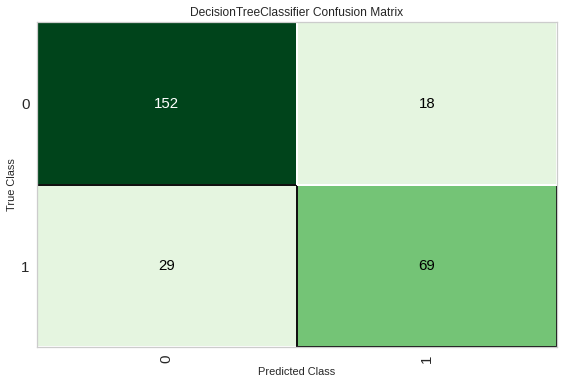

In [12]:
### Confusion Matrix

plot_model(tuned_dt, plot = 'confusion_matrix')

### Finalización del modelo

Un flujo de trabajo normal en PyCaret comienza con setup(), seguido por la comparación de todos los modelos utilizando compare_models() y la preselección de algunos modelos candidatos (basados en la métrica de interés) para realizar varias técnicas de modelado como el ajuste de hiperparámetros, ensamblaje, apilamiento, etc. 

Este flujo de trabajo conduce finalmente al mejor modelo para utilizarlo en la realización de predicciones sobre datos nuevos. La función finalize_model() ajusta el modelo en el conjunto de datos completo, incluida la muestras de test (30% en este caso). El propósito de esta función es entrenar el modelo en el conjunto de datos completo antes de desplegarlo en producción.

In [13]:
final_dt = finalize_model(tuned_dt)

print(final_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.0001, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


## AutoML




La función automl( ), devuelve el mejor modelo de todos los modelos entrenados en la sesión actual en función del parámetro de optimización. Se puede acceder a las métricas evaluadas mediante la función get_metrics.

In [14]:
exp_name = setup(data = train,  target = 'Survived')
top3 = compare_models(n_select = 3)
tuned_top3 = [tune_model(i) for i in top3]
blender = blend_models(tuned_top3)
stacker = stack_models(tuned_top3)
best_auc_model = automl(optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7937,0.8568,0.7083,0.7391,0.7234,0.5590,0.5593
1,0.8413,0.9434,0.8333,0.7692,0.8000,0.6688,0.6702
2,0.9048,0.9283,0.8261,0.9048,0.8636,0.7907,0.7926
3,0.8226,0.8272,0.6522,0.8333,0.7317,0.6021,0.6122
4,0.7903,0.8997,0.6957,0.7273,0.7111,0.5467,0.5470
5,0.7903,0.8724,0.6087,0.7778,0.6829,0.5298,0.5386
6,0.8548,0.8930,0.8261,0.7917,0.8085,0.6917,0.6921
7,0.8226,0.8606,0.6957,0.8000,0.7442,0.6094,0.6129
8,0.8226,0.9108,0.7391,0.7727,0.7556,0.6164,0.6168
9,0.8387,0.8919,0.7826,0.7826,0.7826,0.6544,0.6544


In [15]:
get_metrics()

,Name,Display Name,Score Function,Scorer,Target,Args,Greater is Better,Multiclass,Custom
ID,,,,,,,,,
acc,Accuracy,Accuracy,<function accuracy_score at 0x7fb5162eb820>,accuracy,pred,{},True,True,False
auc,AUC,AUC,<function roc_auc_score at 0x7fb5162e5700>,"make_scorer(roc_auc_score, needs_proba=True, e...",pred_proba,"{'average': 'weighted', 'multi_class': 'ovr'}",True,True,False
recall,Recall,Recall,<function binary_multiclass_score_func.<locals...,"make_scorer(wrapper, average=macro)",pred,{'average': 'macro'},True,True,False
precision,Precision,Prec.,<function binary_multiclass_score_func.<locals...,"make_scorer(wrapper, average=weighted)",pred,{'average': 'weighted'},True,True,False
f1,F1,F1,<function binary_multiclass_score_func.<locals...,"make_scorer(wrapper, average=weighted)",pred,{'average': 'weighted'},True,True,False
kappa,Kappa,Kappa,<function cohen_kappa_score at 0x7fb5162ebb80>,make_scorer(cohen_kappa_score),pred,{},True,True,False
mcc,MCC,MCC,<function matthews_corrcoef at 0x7fb5162ebdc0>,make_scorer(matthews_corrcoef),pred,{},True,True,False


In [16]:
best_auc_model

StackingClassifier(cv=StratifiedKFold(n_splits=10,
        random_state=RandomState(MT19937) at 0x7FB527459E40, shuffle=False),
                   estimators=[('ridge',
                                RidgeClassifier(alpha=0.69, class_weight=None,
                                                copy_X=True, fit_intercept=True,
                                                max_iter=None, normalize=False,
                                                random_state=4060,
                                                solver='auto', tol=0.001)),
                               ('lightgbm',
                                LGBMClassifier(bagging_fraction=0.5,
                                               bagging_freq=7,
                                               b...
                                                     random_state=4060,
                                                     verbose=0,
                                                     warm_start=False))],
          

En el ejemplo anterior se ha desarrollado un ejemplo completo de AutoML con los pasos anteriormente explicados. En total con siete líneas de código se ha realizado un flujo completo de AutoML. 

Hay que destacar que el único inconveniente es que setup() requiere de realimentación por parte del usuario.

## Ventajas:

	- Pocas líneas de código

	- Busqueda de hiperparametros, stack. 
    

 ## Contras:

	- No cuenta con DL